In [20]:
import time
from random import randint
import matplotlib.pyplot as plt
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.setrecursionlimit(10005)

In [21]:
class Compteur(object):
    def __init__(self, nom):
        self.nom = nom

    def __enter__(self):
        self.t_debut = time.time()

    def __exit__(self, exc_ty, exc_val, exc_tb):
        t_fin = time.time()
        print('{}: {}'.format(self.nom, t_fin - self.t_debut))

<h2> Tri sélection </h2>

In [22]:
def tri_selection(t, n):
    if n < 2:
        # Moins de 2 éléments : pas besoin de trier
        return t
    for i in range(n-1):
        # On suppose que le min est en premier
        min = t[i]
        imin = i
        for j in range(i+1, n):
            if t[j] < min:
                # On met à jour le min
                min = t[j]
                imin = j
        if imin != i:
            # On pertmute pour mettre le min en premier
            t[imin] = t[i]
            t[i] = min
    return t

<h2>  Tri insertion </h2>

In [23]:
def tri_insertion(t, n):
    if n < 2:
        # Moins de 2 éléments : pas besoin de trier
        return t
    for i in range(2, n):
        temp = t[i]
        j = i - 1
        while t[j] > t[i] and j >= 0:
            t[j+1] = t[j]
            j -= 1
        t[j] = temp
    return t

<h2> Tri Fusion </h2>

In [24]:
def tri_fusion(t, n):
    def vidage(ta, pa, na, t, p):
        for i in range(pa, na):
            t[p] = ta[i]
            p += 1
        return t

    if n < 2:
        # Moins de 2 éléments : pas besoin de trier
        return t

    # Cas général : on découpe le tableau en 2 partie que l'on trie
    p = n // 2
    t1 = t[:p]
    n1 = len(t1)
    t1 = tri_fusion(t1, n1)
    t2 = t[p:]
    n2 = len(t2)
    t2 = tri_fusion(t2, n2)
    # Fusion des deux parties
    p1, p2, p = 0, 0, 0 # position dans t1, t2 et t
    while p1 < n1 and p2 < n2:
        if t1[p1] < t2[p2]:
            # On met t1[p1] dans t
            t[p] = t1[p1]
            p1 += 1
        else:
            # On met t2[p2] dans t
            t[p] = t2[p2]
            p2 += 1
        p += 1
    if p1 == len(t1):
        vidage(t2, p2, len(t2), t, p)
    else:
        vidage(t1, p1, len(t1), t, p)
    return t

<h2>Tri à Bulle </h2>

In [25]:
def tri_bulle(t, n):
    if n < 2:
        # Moins de 2 éléments : pas besoin de trier
        return t
    for i in range(n-1):
        for j in range(n-1-i):
            if t[j] > t[j+1]:
                # On permute
                temp = t[j]
                t[j] = t[j+1]
                t[j+1] = temp
    return t

<h2>Tri Rapide</h2>

In [26]:
def tri_rapide(t, n):
    def tri_rapide(t, i, j):
        if i >= j:
            # Pas besoin de trier
            return t
        p = i
        # On place les éléments plus petits que le pivot (t[j-1]) au début
        for k in range(i, j-1):
            if t[k] <= t[j-1]:
                t[k], t[p] = t[p], t[k]
                p += 1
        # On remet le pivot après les éléments plus petits
        t[j-1], t[p] = t[p], t[j-1]
        # On trie les deux parties
        tri_rapide(t, i, p-1)
        tri_rapide(t, p+1, j-1)
        return t

    if n < 2:
        # Moins de 2 éléments : pas besoin de trier
        return t

    t = tri_rapide(t, 0, n)
    return t

In [27]:
t = [randint(0, 1000) for i in range(5000)]

In [28]:
with Compteur("Tri par sélection"):
        t2 = tri_selection(t, len(t))
with Compteur("Tri par insertion"):
        t4 = tri_insertion(t, len(t))
with Compteur("Tri fusion"):
        t5 = tri_fusion(t, len(t))
with Compteur("Tri bulle"):
        t6 = tri_bulle(t, len(t))
#with Compteur("Tri rapide"):
       # t7 = tri_rapide(t, len(t))

Tri par sélection: 1.815580129623413
Tri par insertion: 0.0009970664978027344
Tri fusion: 0.03565645217895508
Tri bulle: 3.3365845680236816


<h2>Présentation des graphes </h2>

<h3>tri insertion</h3>

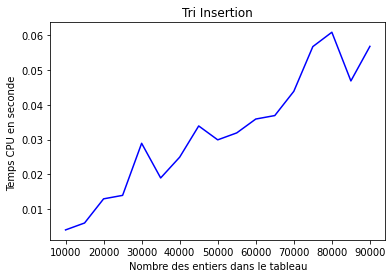

In [29]:
plt.figure()
x= np.array([10000,15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 55000, 60000, 65000, 70000, 75000, 80000,85000,90000])
y= np.array([0.003988, 0.00598, 0.01293, 0.01393, 0.02892, 0.01894, 0.02493, 0.03391, 0.02991, 0.03191, 0.03590, 0.03690, 0.04388, 0.05675, 0.06088, 0.04687, 0.05682])
plt.title("Tri Insertion")
plt.xlabel("Nombre des entiers dans le tableau")
plt.ylabel("Temps CPU en seconde ")
plt.plot(x,y,"blue")
plt.show()


<h3>tri fusion</h3>

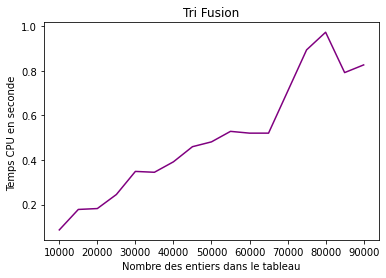

In [30]:
x= np.array([10000,15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 55000, 60000, 65000, 70000, 75000, 80000,85000,90000])
y= np.array([0.086766, 0.17852, 0.18251, 0.24540, 0.34896, 0.34511, 0.39196, 0.45976, 0.48140, 0.52849, 0.52048, 0.52048, 0.70708, 0.89370, 0.97271, 0.79187, 0.82634])
plt.title("Tri Fusion")
plt.xlabel("Nombre des entiers dans le tableau")
plt.ylabel("Temps CPU en seconde ")
plt.plot(x,y,"purple")
plt.show()

<h2>Tri à bulle </h2>

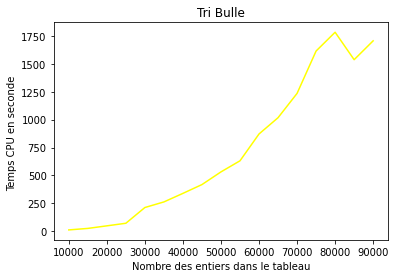

In [31]:
x= np.array([10000,15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 55000, 60000, 65000, 70000, 75000, 80000,85000,90000])
y= np.array([11.423344, 24.92694, 47.91472, 71.10167, 212.2228, 262.3620, 339.0891, 417.8861, 531.6373, 631.0671, 871.5127, 1017.3513, 1235.32282, 1615.11323, 1783.43528, 1537.38083, 1706.58093])
plt.title("Tri Bulle")
plt.xlabel("Nombre des entiers dans le tableau")
plt.ylabel("Temps CPU en seconde ")
plt.plot(x,y,"yellow")
plt.show()

<h2>Tri Rapide</h2>

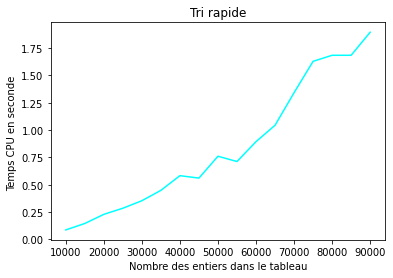

In [32]:
x= np.array([10000,15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 55000, 60000, 65000, 70000, 75000, 80000,85000,90000])
y= np.array([0.085798, 0.14463, 0.22838, 0.28423, 0.35306, 0.44791, 0.58229, 0.56004, 0.76012, 0.71169, 0.89371, 1.043584, 1.34158, 1.62879, 1.68415, 1.68415, 1.89504])
plt.title("Tri rapide")
plt.xlabel("Nombre des entiers dans le tableau")
plt.ylabel("Temps CPU en seconde ")
plt.plot(x,y,"cyan")
plt.show()

<h3>Tri sélection </h3>

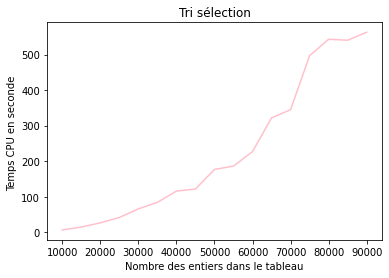

In [19]:
plt.figure()
x= np.array([10000,15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 55000, 60000, 65000, 70000, 75000, 80000,85000,90000])
y= np.array([6.382199, 14.48654, 26.24159, 41.41061, 65.68911, 83.89686, 115.70967, 121.56293, 176.65348, 185.99470, 226.90789, 321.81685, 344.94016, 497.02503, 543.08678, 540.50561, 562.96635])
plt.title("Tri sélection")
plt.xlabel("Nombre des entiers dans le tableau")
plt.ylabel("Temps CPU en seconde ")
plt.plot(x,y,"pink")
plt.show()